In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# **Step1: Explore the train and test datasets**

# **Organize the dataset in CSV file**

In [ ]:
import pandas as pd
import re
from google.colab import files

# Step 1: Upload the Word file to Colab
uploaded = files.upload()

# Step 2: Specify the filename (replace 'your_file.docx' with the name of your uploaded file)
word_file = list(uploaded.keys())[0]

# Step 3: Extract lines from the Word file
from docx import Document

doc = Document(word_file)
lines = [line.text for line in doc.paragraphs if line.text.strip()]

# Step 4: Parse the lines into components
data = []
for line in lines:
    match = re.match(r'(\w+):(\w+)\s+(.+)', line)
    if match:
        asker, question_topic, question = match.groups()
        data.append({'asker': asker, 'question_topic': question_topic, 'question': question})

# Step 5: Create a DataFrame
df = pd.DataFrame(data)

# Step 6: Save as a CSV file
csv_filename = 'questions.csv'
df.to_csv(csv_filename, index=False)

# Step 7: Download the CSV file
files.download(csv_filename)


Saving NUM.docx to NUM.docx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Discover Dataset**

In [ ]:
import pandas as pd
import pandas as pd

# Load the datasets
train_data = pd.read_csv('Train Set.csv')
test_data = pd.read_csv('Test Set.csv')

In [ ]:
train_data.head()

,asker,question_topic,question
0,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR,exp,What is the full form of .com ?


# **Droping the question_topic**

In [ ]:
#train_data=train_data.drop(['question_topic'],axis=1)
#test_data = test_data.drop(['question_topic'], axis=1)

# **Counting the target values of asker**

In [ ]:
# Counting the target values of Category

train_data['asker'].value_counts()

,count
asker,
ENTY,1250
HUM,1223
DESC,1162
NUM,896
LOC,835
ABBR,86


# **Distribution of the target**

In [ ]:
# Unique askers and topics in the Train Dataset
unique_askers_train = train_data['asker'].nunique()
unique_topics_train = train_data['question_topic'].nunique()

print(f"Unique askers in Train Dataset: {unique_askers_train}")
print(f"Unique question topics in Train Dataset: {unique_topics_train}")

# Unique askers and topics in the Test Dataset
unique_askers_test = test_data['asker'].nunique()
unique_topics_test = test_data['question_topic'].nunique()

print(f"Unique askers in Test Dataset: {unique_askers_test}")
print(f"Unique question topics in Test Dataset: {unique_topics_test}")


Unique askers in Train Dataset: 6
Unique question topics in Train Dataset: 47
Unique askers in Test Dataset: 6
Unique question topics in Test Dataset: 39


# **Word Cloud of Questions' Topic**

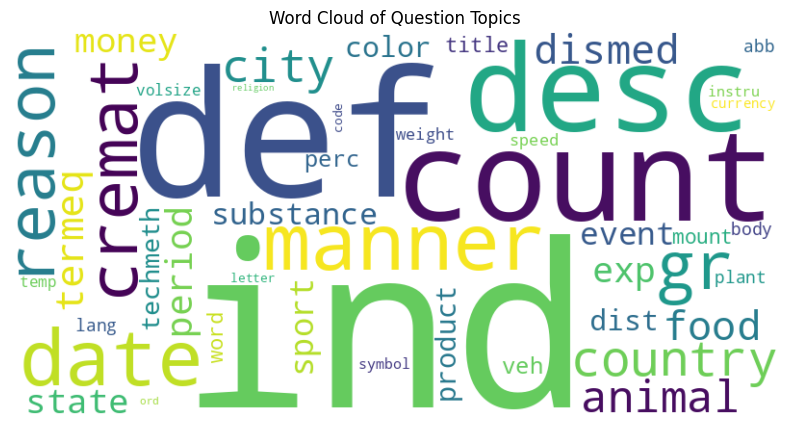

In [ ]:
# Combine question topics from both datasets
all_topics = ' '.join(train_data['question_topic'].astype(str)) + ' ' + ' '.join(test_data['question_topic'].astype(str))

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topics)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Topics")
plt.show()


# **Distribution of Question Topics**

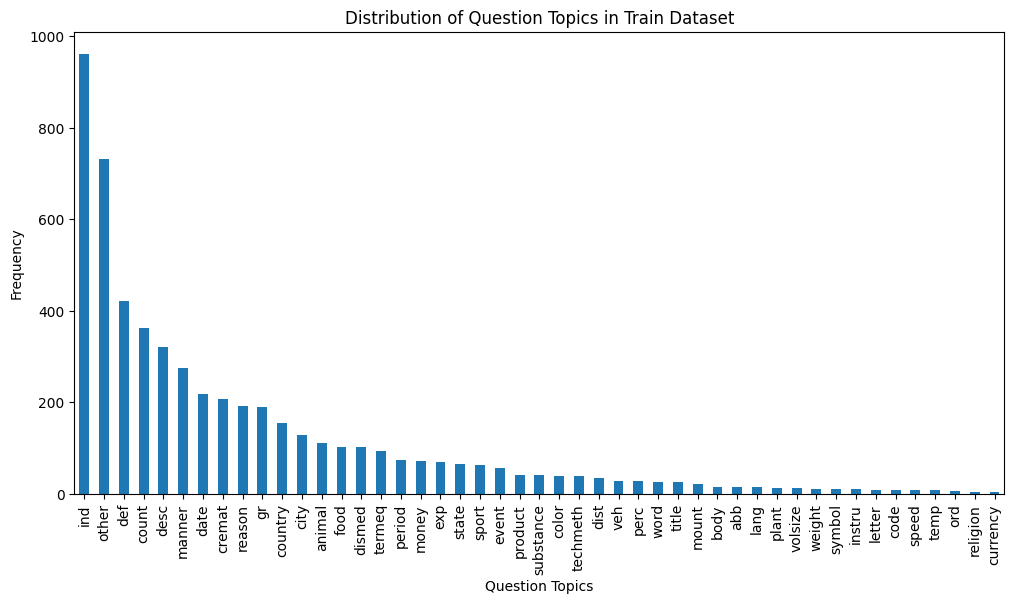

In [ ]:
# Plot the distribution of question topics in Train Dataset
train_data['question_topic'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Question Topics in Train Dataset')
plt.xlabel('Question Topics')
plt.ylabel('Frequency')
plt.show()


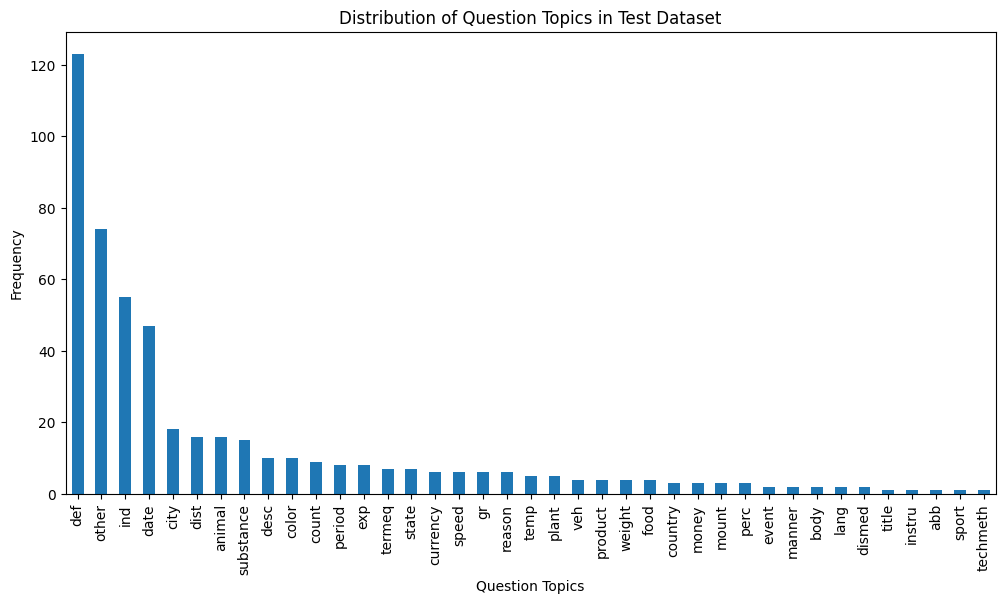

In [ ]:
# Plot the distribution of question topics in Train Dataset
test_data['question_topic'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Question Topics in Test Dataset')
plt.xlabel('Question Topics')
plt.ylabel('Frequency')
plt.show()

# **Distribution of Askers**

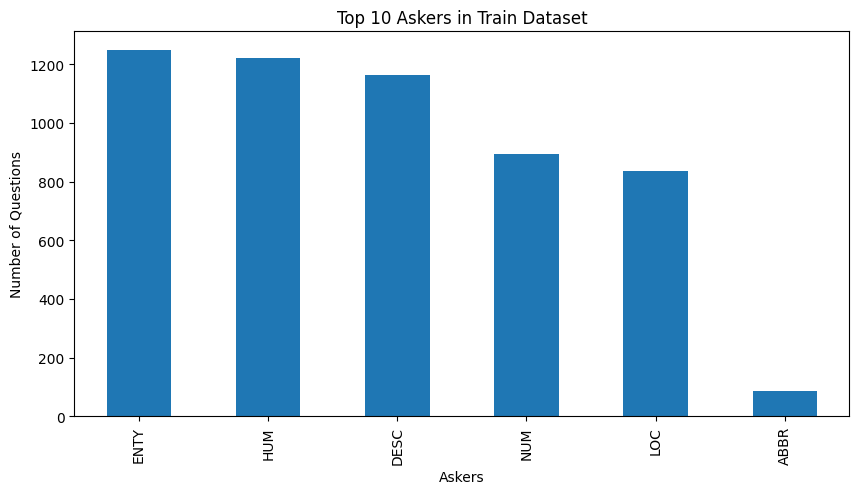

In [ ]:
# Plot the distribution of askers in Train Dataset
top_askers = train_data['asker'].value_counts().head(10)  # Top 10 askers
top_askers.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Askers in Train Dataset')
plt.xlabel('Askers')
plt.ylabel('Number of Questions')
plt.show()



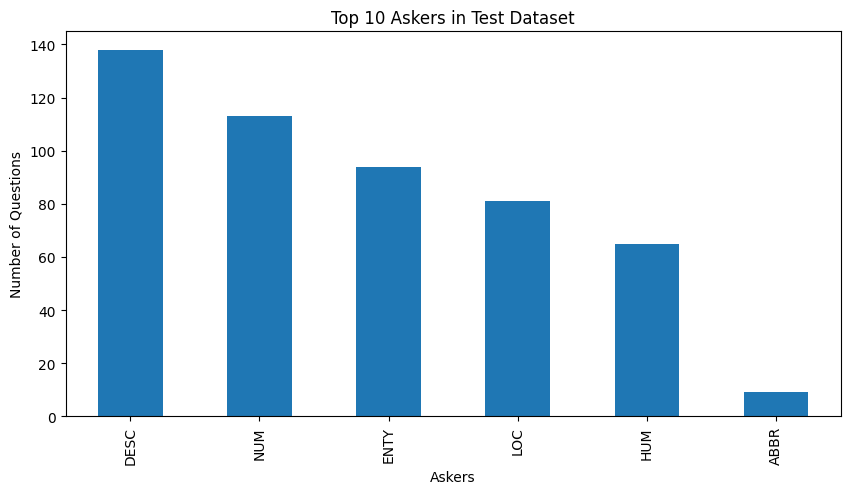

In [ ]:
# Plot the distribution of askers in Train Dataset
top_askers = test_data['asker'].value_counts().head(10)  # Top 10 askers
top_askers.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Askers in Test Dataset')
plt.xlabel('Askers')
plt.ylabel('Number of Questions')
plt.show()

# **Question Length Distribution**

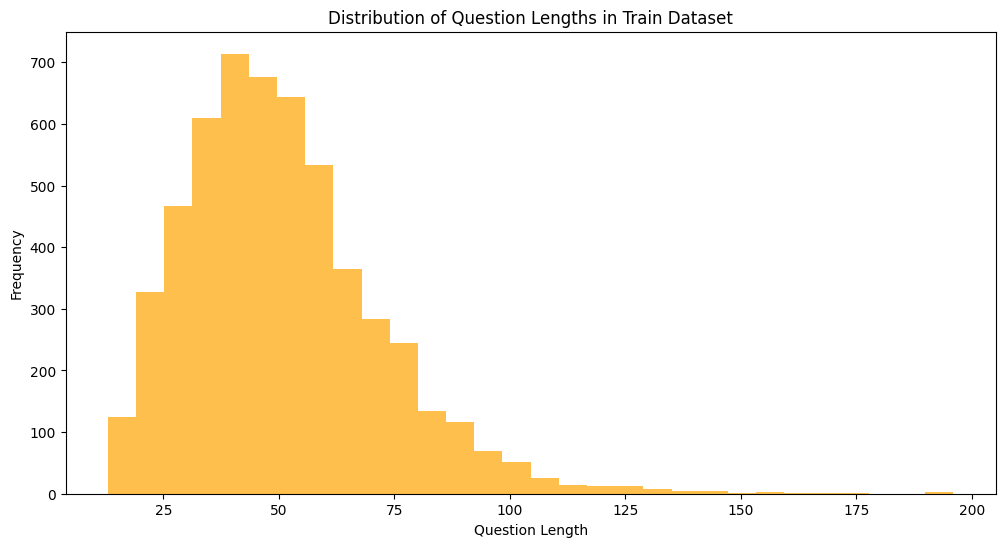

In [ ]:
# Add a column for question length in Train Dataset
train_data['question_length'] = train_data['question'].str.len()

# Histogram of question lengths
plt.figure(figsize=(12, 6))
plt.hist(train_data['question_length'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Question Lengths in Train Dataset')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()


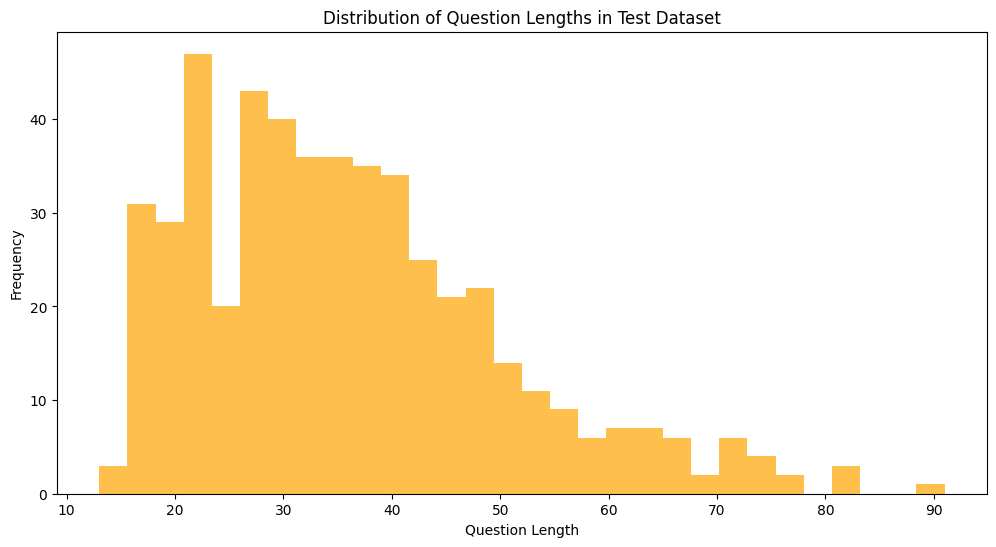

In [ ]:
# Add a column for question length in Train Dataset
test_data['question_length'] = test_data['question'].str.len()

# Histogram of question lengths
plt.figure(figsize=(12, 6))
plt.hist(test_data['question_length'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Question Lengths in Test Dataset')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

# **Check for missing values**

In [ ]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

asker             0
question_topic    0
question          0
dtype: int64
asker             0
question_topic    0
question          0
dtype: int64


# **First Approach: Word2Vec and LSTM**

# **Preprocess the Text Data**

# Preprocess Text

In [ ]:
import re
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    doc = nlp(text)
    lemmatized = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return lemmatized

# Apply preprocessing
train_data['cleaned_question'] = train_data['question'].apply(preprocess_text)
test_data['cleaned_question'] = test_data['question'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


# Tokenize and Train Word2Vec

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize text
train_tokens = [text.split() for text in train_data['cleaned_question']]
test_tokens = [text.split() for text in test_data['cleaned_question']]

# Train Word2Vec
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=128, window=5, min_count=1, workers=4)

# Determine max sequence length
max_length = max(len(tokens) for tokens in train_tokens + test_tokens)

# Prepare Word2Vec features
def get_word2vec_features(tokens, model, max_length):
    features = np.zeros((len(tokens), max_length, model.vector_size))
    for i, sentence in enumerate(tokens):
        for j, word in enumerate(sentence[:max_length]):
            if word in model.wv:
                features[i, j] = model.wv[word]
    return features

train_word2vec = get_word2vec_features(train_tokens, word2vec_model, max_length)
test_word2vec = get_word2vec_features(test_tokens, word2vec_model, max_length)

print("Shape of train_word2vec:", train_word2vec.shape)  # (num_samples, max_length, vector_size)
print("Shape of test_word2vec:", test_word2vec.shape)    # (num_samples, max_length, vector_size)


Shape of train_word2vec: (5452, 15, 128)
Shape of test_word2vec: (500, 15, 128)


# Encode Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['topic_encoded'] = label_encoder.fit_transform(train_data['question_topic'])
test_data['topic_encoded'] = label_encoder.transform(test_data['question_topic'])

y_topic_train = train_data['topic_encoded']
y_topic_test = test_data['topic_encoded']


# **Build and Train LSTM**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional

# Define Word2Vec input
word2vec_input = Input(shape=(max_length, 128), name="word2vec_input")

# LSTM layers
x = Bidirectional(LSTM(128, return_sequences=True))(word2vec_input)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.3)(x)

# Dense layers for classification
output = Dense(len(label_encoder.classes_), activation="softmax", name="topic_output")(x)

# Compile the model
model = Model(inputs=word2vec_input, outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ word2vec_input (InputLayer)          │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 15, 256)             │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ topic_output (Dense)                 │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433,583 (1.65 MB)

 Trainable params: 433,583 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_word2vec,
    y_topic_train,
    validation_data=(test_word2vec, y_topic_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1582 - loss: 3.3045 - val_accuracy: 0.1100 - val_loss: 3.2477
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1672 - loss: 3.0767 - val_accuracy: 0.1100 - val_loss: 3.2051
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1684 - loss: 3.0363 - val_accuracy: 0.3500 - val_loss: 3.0012
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1974 - loss: 2.9371 - val_accuracy: 0.1500 - val_loss: 3.0941
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2191 - loss: 2.8674 - val_accuracy: 0.3420 - val_loss: 2.9247
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2490 - loss: 2.7656 - val_accuracy: 0.3380 - val_loss: 2.8900
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2471 - loss: 2.7211 - val_accuracy: 0.3720 - val_loss: 2.7682
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2567 - loss: 2.6793 - val_acc

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predict classes on the test set
y_pred = model.predict(test_word2vec)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute metrics
accuracy = accuracy_score(y_topic_test, y_pred_classes)
f1 = f1_score(y_topic_test, y_pred_classes, average="weighted")
precision = precision_score(y_topic_test, y_pred_classes, average="weighted")
recall = recall_score(y_topic_test, y_pred_classes, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step
Accuracy: 0.432
F1 Score: 0.3628023589143255
Precision: 0.351701927112209
Recall: 0.432


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


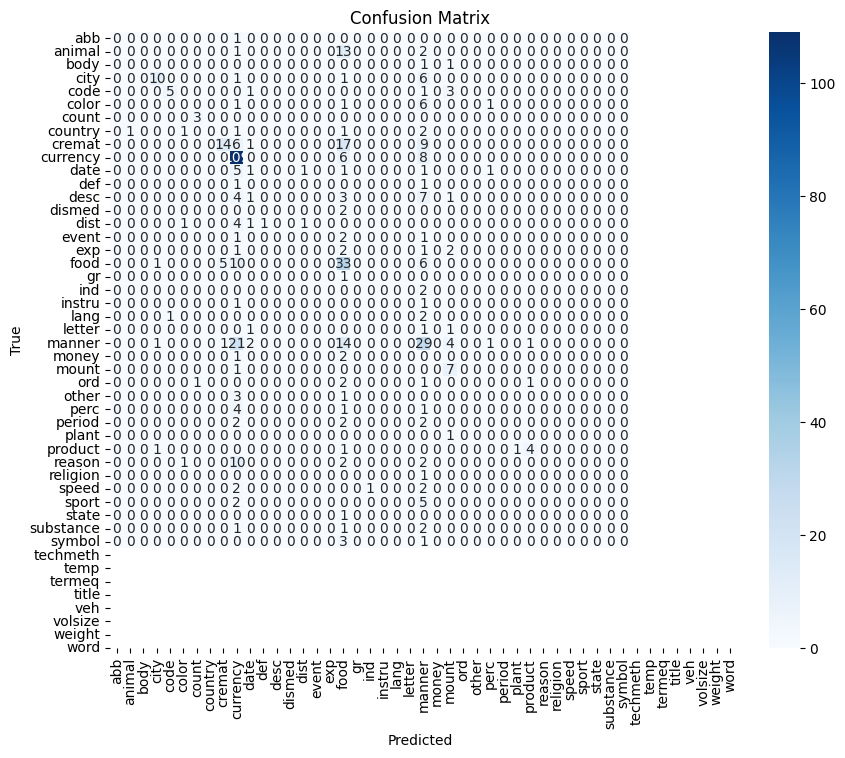

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_topic_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Second Approach: TF-IDF Vectorizer and LSTM**

# **Data Processing**

# Extract Features Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform TF-IDF features for training and testing
train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_question']).toarray()
test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_question']).toarray()

print("Shape of train_tfidf:", train_tfidf.shape)  # (num_samples, num_features)
print("Shape of test_tfidf:", test_tfidf.shape)    # (num_samples, num_features)


Shape of train_tfidf: (5452, 5000)
Shape of test_tfidf: (500, 5000)


# Encode Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['topic_encoded'] = label_encoder.fit_transform(train_data['question_topic'])
test_data['topic_encoded'] = label_encoder.transform(test_data['question_topic'])

y_topic_train = train_data['topic_encoded']
y_topic_test = test_data['topic_encoded']


# TF-IDF to 3D for LSTM

In [ ]:
# Reshape TF-IDF to 3D for LSTM
train_tfidf_lstm = train_tfidf.reshape(train_tfidf.shape[0], train_tfidf.shape[1], 1)
test_tfidf_lstm = test_tfidf.reshape(test_tfidf.shape[0], test_tfidf.shape[1], 1)

print("Shape of train_tfidf_lstm:", train_tfidf_lstm.shape)  # (num_samples, num_features, 1)
print("Shape of test_tfidf_lstm:", test_tfidf_lstm.shape)    # (num_samples, num_features, 1)


Shape of train_tfidf_lstm: (5452, 5000, 1)
Shape of test_tfidf_lstm: (500, 5000, 1)


# **Build and Train LSTM**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional

# Define LSTM input
lstm_input = Input(shape=(train_tfidf_lstm.shape[1], 1), name="lstm_input")

# LSTM layers
x = Bidirectional(LSTM(128, return_sequences=True))(lstm_input)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.3)(x)

# Dense layers for classification
output = Dense(len(label_encoder.classes_), activation="softmax", name="topic_output")(x)

# Compile the model
model = Model(inputs=lstm_input, outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)              │ (None, 5000, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 5000, 256)           │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5000, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ topic_output (Dense)                 │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,535 (1.16 MB)

 Trainable params: 303,535 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_tfidf_lstm,
    y_topic_train,
    validation_data=(test_tfidf_lstm, y_topic_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 107s 603ms/step - accuracy: 0.1319 - loss: 3.2993 - val_accuracy: 0.1100 - val_loss: 3.2554
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 142s 604ms/step - accuracy: 0.1609 - loss: 3.0915 - val_accuracy: 0.1100 - val_loss: 3.2173
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 139s 586ms/step - accuracy: 0.1678 - loss: 3.0822 - val_accuracy: 0.1100 - val_loss: 3.2461
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 144s 597ms/step - accuracy: 0.1622 - loss: 3.0451 - val_accuracy: 0.1100 - val_loss: 3.2530
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 142s 598ms/step - accuracy: 0.1742 - loss: 3.0617 - val_accuracy: 0.1100 - val_loss: 3.2416
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 140s 588ms/step - accuracy: 0.1729 - loss: 3.0739 - val_accuracy: 0.1100 - val_loss: 3.2212
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 157s 679ms/step - accuracy: 0.1579 - loss: 3.0864 - val_accuracy: 0.1100 - val_loss: 3.2459
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 130s 607ms/step - accuracy: 0.1696 -

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step
Accuracy: 0.112
F1 Score: 0.023213984327908378
Precision: 0.01314859437751004
Recall: 0.112


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


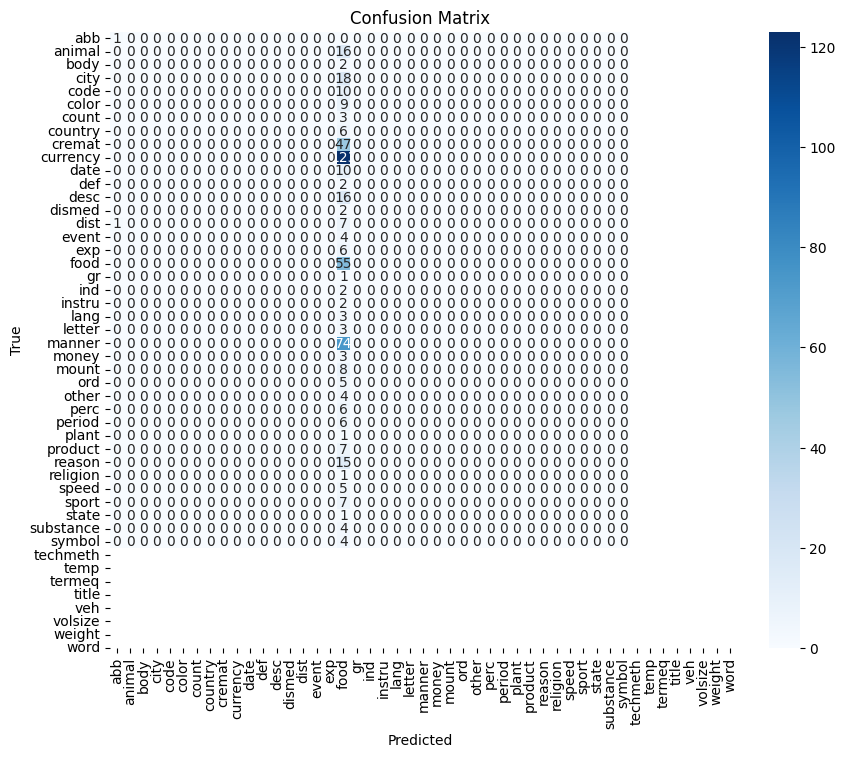

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(test_tfidf_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute metrics
accuracy = accuracy_score(y_topic_test, y_pred_classes)
f1 = f1_score(y_topic_test, y_pred_classes, average="weighted")
precision = precision_score(y_topic_test, y_pred_classes, average="weighted")
recall = recall_score(y_topic_test, y_pred_classes, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Confusion matrix
conf_matrix = confusion_matrix(y_topic_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
